In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [24]:
test_df.대출목적.unique()

array(['주택 개선', '부채 통합', '신용 카드', '기타', '주요 구매', '이사', '휴가', '소규모 사업',
       '주택', '의료', '자동차', '재생 에너지', '결혼'], dtype=object)

In [6]:
categorical_cols = ['주택소유상태', '대출목적']

In [7]:
check_cols = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in check_cols:
    print(col)
    print(train_df[col].unique())
    print()

대출기간
[' 36 months' ' 60 months']

근로기간
['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']

주택소유상태
['RENT' 'MORTGAGE' 'OWN' 'ANY']

대출목적
['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']



In [8]:
for term in train_df['근로기간'].unique():
    num = term[:2].strip()
    if num.isdigit():
        train_df.loc[train_df['근로기간'] == term, '근로기간'] = int(num)
    elif num == '<' or num == '<1':
        train_df.loc[train_df['근로기간'] == term, '근로기간'] = 0
    else:
        train_df.loc[train_df['근로기간'] == term, '근로기간'] = -1

In [9]:
train_df['근로기간'] = train_df['근로기간'].astype(int)
train_df['근로기간']

0         6
1        10
2         5
3         8
4        -1
         ..
96289    10
96290    10
96291     1
96292     5
96293    10
Name: 근로기간, Length: 96294, dtype: int64

In [10]:
train_df['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)

In [11]:
for grade in train_df['대출등급'].unique():
    train_df.loc[train_df['대출등급'] == grade, '대출등급'] = ord(grade) - 65

In [12]:
gruoped = train_df[['대출목적', '대출등급']].groupby('대출목적')
gruoped['대출등급'].agg(['mean']).sort_values('mean')

,mean
대출목적,
신용 카드,1.288163
자동차,1.540778
주택 개선,1.658929
주요 구매,1.726012
부채 통합,1.850082
휴가,1.899142
의료,2.040423
기타,2.146667
이사,2.381423


In [13]:
gruoped = train_df[['주택소유상태', '대출등급']].groupby('주택소유상태')
gruoped['대출등급'].agg(['mean']).sort_values('mean')

,mean
주택소유상태,
MORTGAGE,1.637126
OWN,1.743101
RENT,1.824267
ANY,2.0


In [14]:
replace_dict = {
    '대출기간' : {' 36 months' : 36, ' 60 months' : 60},
    '주택소유상태' : {'RENT' : 0, 'MORTGAGE' : 2, 'OWN' : 1, 'ANY' : -1},
    '대출목적' : {k : v for v, k in enumerate(['신용 카드', '자동차', '주택 개선', '주요 구매', '부채 통합', '휴가', '의료', '기타', '이사','재생 에너지', '소규모 사업', '주택'])}
}

In [15]:
for col in replace_dict:
    value_dict = replace_dict[col]
    for value in value_dict:
        train_df.loc[train_df[col] == value, col] = value_dict[value]

In [19]:
valid_df = train_df.sample(frac=1)

df_list = []
df_list.append(valid_df.loc[valid_df['대출등급'] == 0][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 1][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 2][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 3][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 4][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 5][:420])
df_list.append(valid_df.loc[valid_df['대출등급'] == 6][:420])

normal_distributed_df = pd.concat(df_list)

new_valid_df = normal_distributed_df.sample(frac=1, random_state=42)

new_valid_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
49891,TRAIN_49891,35520000,60,2,1,132000000,7.34,11,7,0,1008036,1847676.0,0.0,0.0,5
63872,TRAIN_63872,42000000,60,10,2,231408000,11.04,33,0,1,1641156,1140264.0,0.0,0.0,1
46333,TRAIN_46333,14250000,60,0,0,39600000,23.02,24,4,0,0,0.0,0.0,0.0,5
40621,TRAIN_40621,18000000,36,0,0,228000000,15.50,30,11,0,1838136,347640.0,0.0,0.0,0
1976,TRAIN_01976,17220000,60,7,1,78000000,4.32,28,2,0,541380,760056.0,0.0,0.0,4


In [20]:
from collections import Counter
Counter(new_valid_df['대출등급'])

Counter({5: 420, 1: 420, 0: 420, 4: 420, 2: 420, 3: 420, 6: 420})

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/kwon/miniconda3/envs/reg/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/Users/kwon/miniconda3/envs/reg/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.draw()
/Users/kwon/miniconda3/envs/reg/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
/Users/kwon/miniconda3/envs/reg/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Malgun Gothic' not found.
/Users/kwon/miniconda3/envs/reg/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) 

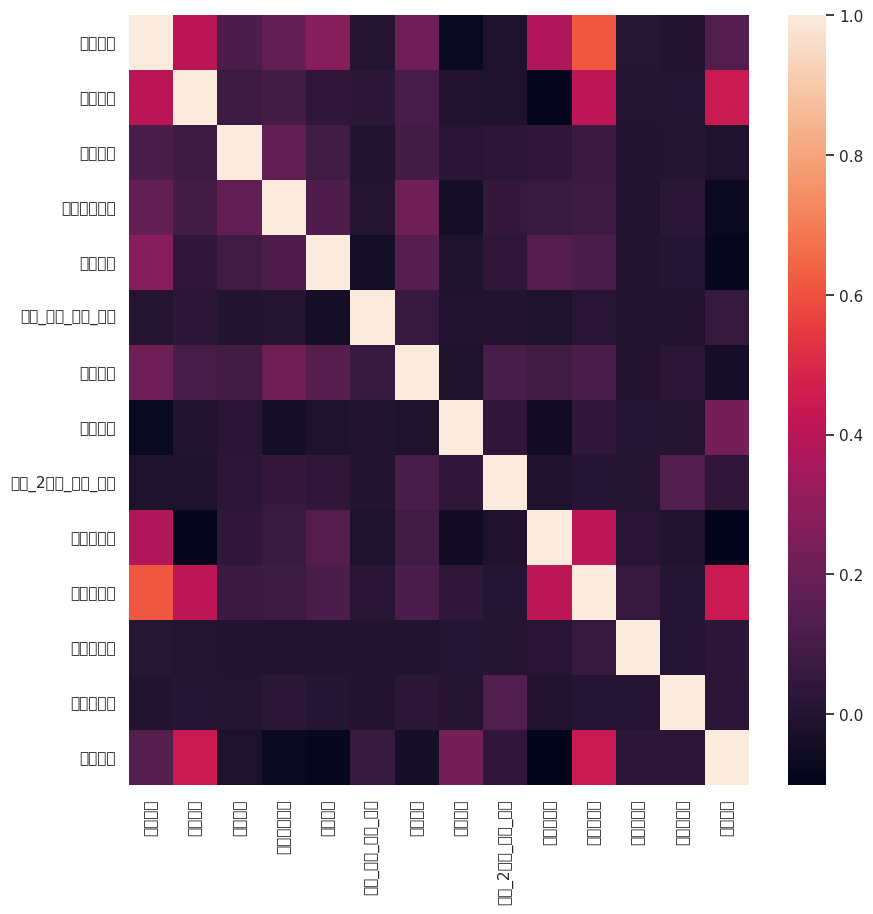

총상환원금          -0.101515
연간소득           -0.083666
주택소유상태         -0.069114
총계좌수           -0.039991
근로기간           -0.016312
연체계좌수           0.025681
총연체금액           0.028663
최근_2년간_연체_횟수    0.039786
부채_대비_소득_비율     0.054121
대출금액            0.137049
대출목적            0.229218
대출기간            0.443839
총상환이자           0.444245
대출등급            1.000000
Name: 대출등급, dtype: float64


In [23]:
plt.figure(figsize=(10, 10))
droped_train_df = train_df.drop(['ID'], axis=1)
cor = droped_train_df.corr()
sns.heatmap(cor)
plt.show()
print(cor['대출등급'].sort_values())

In [17]:
train_df.to_csv('./data/train_preproc.csv', index=False)
pd.read_csv('./data/train_preproc.csv')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,0,72000000,18.90,15,4,0,0,0.0,0.0,0.0,2
1,TRAIN_00001,14400000,60,10,2,130800000,22.33,21,2,0,373572,234060.0,0.0,0.0,1
2,TRAIN_00002,12000000,36,5,2,96000000,8.60,14,4,0,928644,151944.0,0.0,0.0,0
3,TRAIN_00003,14400000,36,8,2,132000000,15.09,15,4,0,325824,153108.0,0.0,0.0,2
4,TRAIN_00004,18000000,60,-1,0,71736000,25.39,19,3,0,228540,148956.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36,10,2,210000000,9.33,33,0,0,974580,492168.0,0.0,0.0,2
96290,TRAIN_96290,28800000,60,10,2,132000000,5.16,25,2,0,583728,855084.0,0.0,0.0,4
96291,TRAIN_96291,14400000,36,1,2,84000000,11.24,22,0,0,1489128,241236.0,0.0,0.0,0
96292,TRAIN_96292,15600000,36,5,2,66330000,17.30,21,4,2,1378368,818076.0,0.0,0.0,3


In [ ]:
# 연간소득           -0.146306
# 총상환원금          -0.117580
# 주택소유상태         -0.083525
# 총계좌수           -0.050428
    # 근로기간           -0.001032
    # 연체계좌수           0.004242
# 총연체금액           0.046745
# 최근_2년간_연체_횟수    0.055256
# 부채_대비_소득_비율     0.190790
# 대출금액            0.231026
# 대출목적            0.323992
# 총상환이자           0.523754
# 대출기간            0.595375
# 대출등급            1.000000


# 총상환원금          -0.101515
# 연간소득           -0.083666
# 주택소유상태         -0.069114
    # 총계좌수           -0.039991
    # 근로기간           -0.016312
    # 연체계좌수           0.025681
# 총연체금액           0.028663
# 최근_2년간_연체_횟수    0.039786
# 부채_대비_소득_비율     0.054121
# 대출금액            0.137049
# 대출목적            0.229218
# 대출기간            0.443839
# 총상환이자           0.444245